<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/CatBoost_Pantheon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from IPython import get_ipython
from IPython.display import display

In [13]:
# %%
!pip install catboost
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub
# %%

In [14]:
# Download latest version
path = kagglehub.dataset_download("mit/pantheon-project")

print("Path to dataset files:", path)
# %%

Path to dataset files: /kaggle/input/pantheon-project


In [15]:
# Load dataset
csv_file = f"{path}/database.csv"
df = pd.read_csv(csv_file)
# %%

In [31]:
# Identify target and features
target = 'page_views'
X = df.drop(columns=[target,'average_views','article_languages','article_id','historical_popularity_index'])
y = df[target]
# %%

In [32]:
# Identify categorical columns (example: you may need to adjust based on your dataset)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [33]:
# Fill NaN values in categorical columns with a placeholder string
for col in categorical_cols:
    if col in X.columns: # Check if the column exists in X
        X[col] = X[col].fillna('NaN').astype(str)

# %%

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# %%

In [35]:
# Initialize and train model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_cols,
    verbose=100
)
model.fit(X_train, y_train)
# %%

0:	learn: 7539413.4148988	total: 27.6ms	remaining: 27.5s
100:	learn: 6573184.4656685	total: 2.03s	remaining: 18.1s
200:	learn: 6396554.7131252	total: 4.05s	remaining: 16.1s
300:	learn: 6226639.4141704	total: 7.44s	remaining: 17.3s
400:	learn: 6065351.8488672	total: 9.64s	remaining: 14.4s
500:	learn: 5919370.3845955	total: 11.8s	remaining: 11.7s
600:	learn: 5760880.5531277	total: 13.9s	remaining: 9.24s
700:	learn: 5630275.4916345	total: 16.2s	remaining: 6.9s
800:	learn: 5500563.0145556	total: 19.8s	remaining: 4.91s
900:	learn: 5381636.1383580	total: 21.9s	remaining: 2.41s
999:	learn: 5267994.5183523	total: 24.1s	remaining: 0us


In [36]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 53378487950141.74


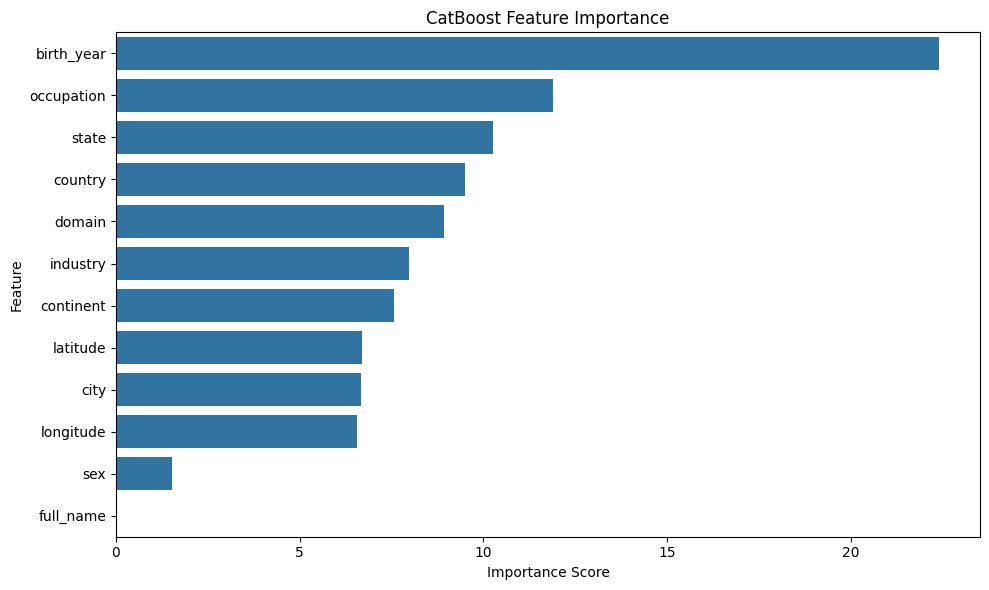

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.get_feature_importance(prettified=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_importances.sort_values(by='Importances', ascending=False))
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()